# Libraries

In [1]:
library(dagitty)
library(tidyverse)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Question

<img src="https://i.ibb.co/QMtj154/q-1-5-2.png" alt="q-1-5-2" border="0">

# Solution

## (a)

Draw the DAG:

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



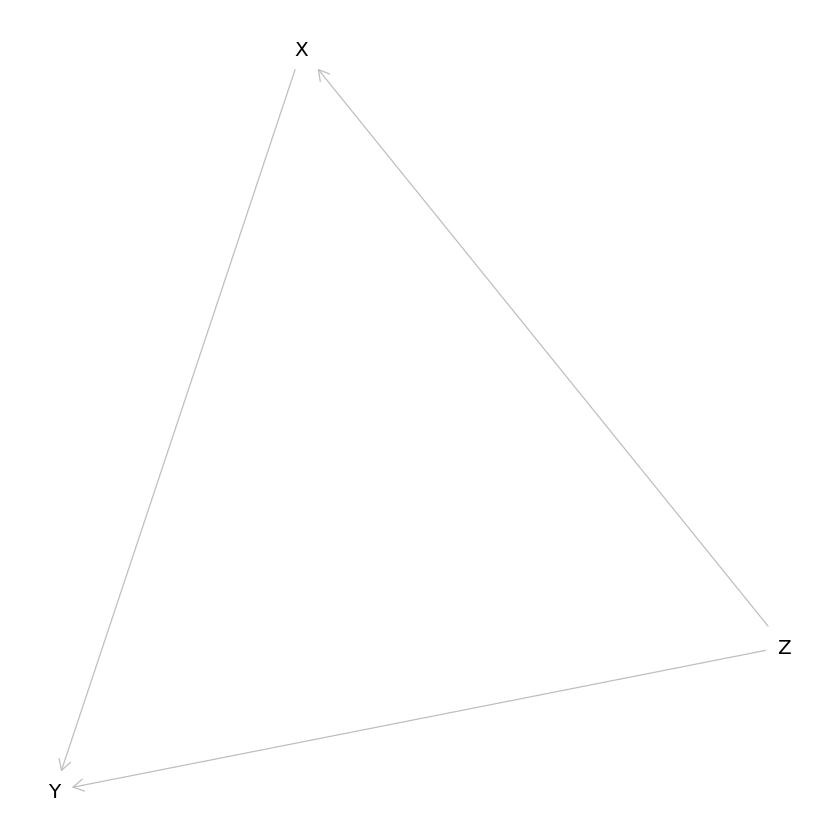

In [2]:
g = dagitty('dag {
    Z -> X; Z -> Y
    X -> Y
}')

plot(g)

Definition of the Product Rule Decomposition:

<img src="https://i.ibb.co/WPqBT5f/product-rule-decomposition.png" alt="product-rule-decomposition" border="0">

So, to get the joint distribution of the DAG:

In [3]:
parent_x <- parents(g, "X")
parent_y <- parents(g, "Y")
parent_z <- parents(g, "Z")

str_interp("The parents of node X: ${parent_x}\n") %>% cat
str_interp("The parents of node Y: ${parent_y}\n") %>% cat
str_interp("The parents of node Z: ${parent_z}\n") %>% cat

The parents of node X: Z
The parents of node Y: c("X", "Z")
The parents of node Z: character(0)


Therefore, the **joint distribution** of the DAG, P(X, Y, Z) is:


$$P(X|Z) . P(Y|X,Z) . P(Z)$$

Note that Z has no parents.

Using marginalization:

To find **P(X, Y)**:

\begin{align}
P(X,Y) & =  P(X,Y)\cap P(Z=z_{0})  +  P(X,Y)\cap P(Z=z_{1}) \\
 & =  P(X,Y,Z=z_{0})   +    P(X,Y,Z=z_{1}) \\
 & =  P(X,Z=z_{0})\,P(Y|X,Z=z_{0})\,P(Z=z_{0}) +   P(X,Z=z_{1})\,P(Y|X,Z=z_{1})\,P(Z=z_{1})
\end{align}


To find **P(X, Z)**:

\begin{align}
P(X,Z) & =  P(X,Z)\cap P(Y=y_{0})  +  P(X,Z)\cap P(Y=y_{1}) \\
 & =  P(X,Y=y_{0}, Z)   +    P(X,Y=y_{1}, Z) \\
 & =  P(X,Z)\,P(Y = y_0|X,Z)\,P(Z) +   P(X,Z)\,P(Y=y_1|X,Z)\,P(Z)
\end{align}

To find **P(Y, Z)**:

\begin{align}
P(Y,Z) & =  P(Y,Z)\cap P(X=x_{0})  +  P(Y,Z)\cap P(X=x_{1}) \\
 & =  P(X=x_0,Y,Z)   +    P(X=x_1,Y,Z) \\
 & =  P(X=x_0,Z)\,P(Y|X=x_1,Z)\,P(Z=z_{0}) +   P(X=x_1,Z)\,P(Y|X=x_1,Z)\,P(Z)
\end{align}


We are given/we know:

* $P(Z=z_1) = r$
* $P(Z=z_0) = 1 - r$
* $P(Y=y_1|X=x_1, Z=z_0) = p_2$
* $P(Y=y_0|X=x_1, Z=z_0) = 1-p_2$
* $P(Y=y_1|X=x_0, Z=z_0) = p_1$
* $P(Y=y_0|X=x_0, Z=z_0) = 1 - p_1$
* $P(Y=y_1|X=x_0, Z=z_1) = p_3$
* $P(Y=y_0|X=x_0, Z=z_1) = 1 - p_3$
* $P(Y=y_1|X=x_1, Z=z_1) = p_4$
* $P(Y=y_0|X=x_1, Z=z_1) = 1 - p_4$
* $P(X=x_1|Z=z_0) = q_1$
* $P(X=x_0|Z=z_0) = 1 - q_1$
* $P(X=x_1|Z=z_1) = q_2$
* $P(X=x_0|Z=z_1) = 1 - q_2$


Table for $P(X, Y, Z)$:

<img src="https://i.ibb.co/8NdF0G0/q-1-5-2-joint-dist.png" alt="q-1-5-2-joint-dist" border="0">

Table for $P(X, Y)$:


<img src="https://i.ibb.co/VS3VBJ7/q-1-5-2-pxy.png" alt="q-1-5-2-pxy" border="0">

Table for $P(X, Z)$:

<img src="https://i.ibb.co/TL8vRcP/q-1-5-2-pxz.png" alt="q-1-5-2-pxz" border="0">

Table for $P(Y, Z)$:

<img src="https://i.ibb.co/kQKn7zD/q-1-5-2-pyz.png" alt="q-1-5-2-pyz" border="0">

## (b)

### (i) $P(y_1|x_1) - P(y_1|x_0)$ for people with $z_1$

\begin{align}
P(y_1|x_1,z_1) - P(y_1|x_0,z_1) & = \frac{P(y_1,x_1,z_1)}{P(x_1, z_1)} - \frac{P(y_1, x_0, z_1)}{P(x_0, z_1)} & , \text{by definition of conditional probability} \\
                                & = \frac{q_2\cdot p_4 \cdot r}{q_2 \cdot (1-p_4) \cdot r + q_2 \cdot p_4 \cdot r} - \frac{(1-q_2) \cdot p_3 \cdot r}{(1-q_2)\cdot(1-p_3)\cdot r + (1-q_2)\cdot p_3\cdot r} & , \text{lookup probability tables}\\
                                & = p_4 - p_3
\end{align}

### (ii) $P(y_1|x_1) - P(y_1|x_0)$ for people with $z_0$

\begin{align}
P(y_1|x_1,z_0) - P(y_1|x_0, z_0) & = p_2 - p_1 &\, , \text{from given information}
\end{align}

### (iii) $P(y_1|x_1) - P(y_1|x_0)$ for entire population

\begin{align}
P(y_1|x_1) - P(y_1|x_0) & = \frac{P(y_1, x_1)}{P(x_1)} & -  & \frac{P(y_1, x_0)}{P(x_0)} &, \text{defn. of conditional probability} \\
& = \frac{q_1 \cdot p_2 \cdot (1-r) + q_2 \cdot p_4 \cdot r}{(q_1 \cdot (1-p_2) \cdot (1-r) + q_2 \cdot (1-p_4) \cdot r) + (q_1 \cdot p_2 \cdot (1-r) + q_2 \cdot p_4 \cdot r)} & -  &  \frac{(1-q_1)\cdot p_1 \cdot (1-r) + (1-q_2) \cdot p_3 \cdot r}{((1-q_1)\cdot (1-p_1) \cdot (1-r) + (1-q_2) \cdot (1-p_3) \cdot r)+((1-q_1)\cdot p_1 \cdot (1-r) + (1-q_2) \cdot p_3 \cdot r)} &, \text{using lookup table and marginalisation} \\
& = \frac{q_1 \cdot p_2 \cdot (1-r) + q_2 \cdot p_4 \cdot r}{-q_1\cdot r + q_2 \cdot r + q_1}  - \frac{(1-q_1)\cdot p_1 \cdot (1-r) + (1-q_2) \cdot p_3 \cdot r}{q_1 \cdot r - q_2 \cdot r - q_1 + 1}
\end{align}

### (c)

Click [here](https://en.wikipedia.org/wiki/Simpson%27s_paradox) for definition of Simpons's reversal.

Let's pick the parameters such that whole population shows improvement in treatment i.e. **b (iii)** > 0 but sub-population shows degradation i.e. **b(i)** and **b(ii)** < 0.

See [this](study_question_1.5.2_part_c_opt.ipynb) notebook for how to get the parameters.

In [4]:
b1 <- function(p3, p4) p4 - p3
b2 <- function(p1, p2)  p2 - p1

b3 <- function(p1, p2, p3, p4, q1, q2, r) {
    term1 <- (q1 * p2 * (1-r) + q2 * p4 * r)/(-q1 * r + q2 * r + q1)
    term2 <- ((1 - q1) * p1 * (1-r) + (1-q2) * p3 * r)/(q1 * r - q2 * r - q1 + 1)
    
    term1 - term2
}

Set 1:

In [5]:
p1 <- 1.0
p2 <- 1.0
p3 <- 0
p4 <- 0
q1 <- 1
q2 <- 0
r <- 0.6447425918411859

cat(str_interp("value of b(i): ${b1(p3, p4)}\n"))
cat(str_interp("value of b(ii): ${b2(p1, p2)}\n"))
cat(str_interp("value of b(iii): ${b3(p1, p2, p3, p4, q1, q2, r)}\n"))

value of b(i): 0
value of b(ii): 0
value of b(iii): 1


Set 2:

In [6]:
p1 <- 1.0
p2 <- 0.90
p3 <- 0.10
p4 <- 0.0
q1 <- 1
q2 <- 0
r <- 0.10

cat(str_interp("value of b(i): ${b1(p3, p4)}\n"))
cat(str_interp("value of b(ii): ${b2(p1, p2)}\n"))
cat(str_interp("value of b(iii): ${b3(p1, p2, p3, p4, q1, q2, r)}\n"))

value of b(i): -0.1
value of b(ii): -0.1
value of b(iii): 0.8


No unique solution?